In [30]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.plot.width = 10, repr.plot.height = 6)

In [3]:
set.seed(2535) 
url <- "https://drive.google.com/uc?export=download&id=11KyK-H_2aP1I4FYR1aAC0wE4JB9BbAqz"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx")
raisin

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


In [20]:
# This is where we clean and wrangle our data
# There is really not too much to do since this dataset is already very tidy
raisin <- raisin |>
    mutate(Class = as_factor(Class)) |>
    filter(!is.na(Area),
           !is.na(MajorAxisLength),
           !is.na(MinorAxisLength),
           !is.na(Eccentricity),
           !is.na(ConvexArea),
           !is.na(Extent),
           !is.na(Perimeter))
raisin

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


In [13]:
# Here we are going to separate our data into training set and test test
raisin_split <- initial_split(raisin, prop = 0.7, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [19]:
# Summarization of data
table_1 <- raisin_train |>
    group_by(Class) |>
    summarize(n = n())
table_1                                               # Number of observations in each class

table_2 <- raisin_train |>
    group_by(Class) |>
    summarize(ave_area = mean(Area),
              ave_major_al = mean(MajorAxisLength),
              ave_minor_al = mean(MinorAxisLength),
              ave_ecc = mean(Eccentricity),
              ave_convex = mean(ConvexArea),
              ave_extent = mean(Perimeter))
table_2                                               # Mean for each variable for each class

table_3 <- raisin_train |>
    select(Area: Perimeter) |>
    map_df(mean)
table_3                                               # Mean for each variable for the entire dataset

Class,n
<fct>,<int>
Kecimen,315
Besni,315


Class,ave_area,ave_major_al,ave_minor_al,ave_ecc,ave_convex,ave_extent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kecimen,62483.99,349.2783,228.0816,0.7397859,64687.42,973.9687
Besni,112025.80,509.9432,279.1861,0.8216611,116741.04,1350.9761


Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87254.9,429.6108,253.6339,0.7807235,90714.23,0.6998381,1162.472


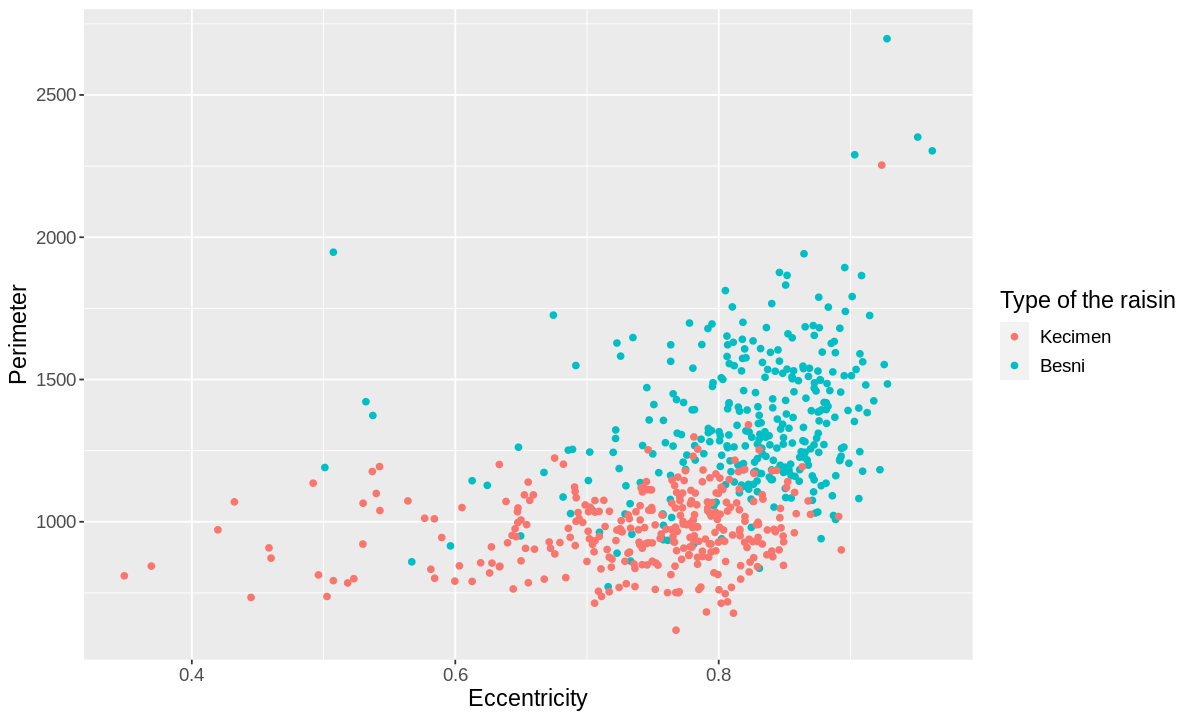

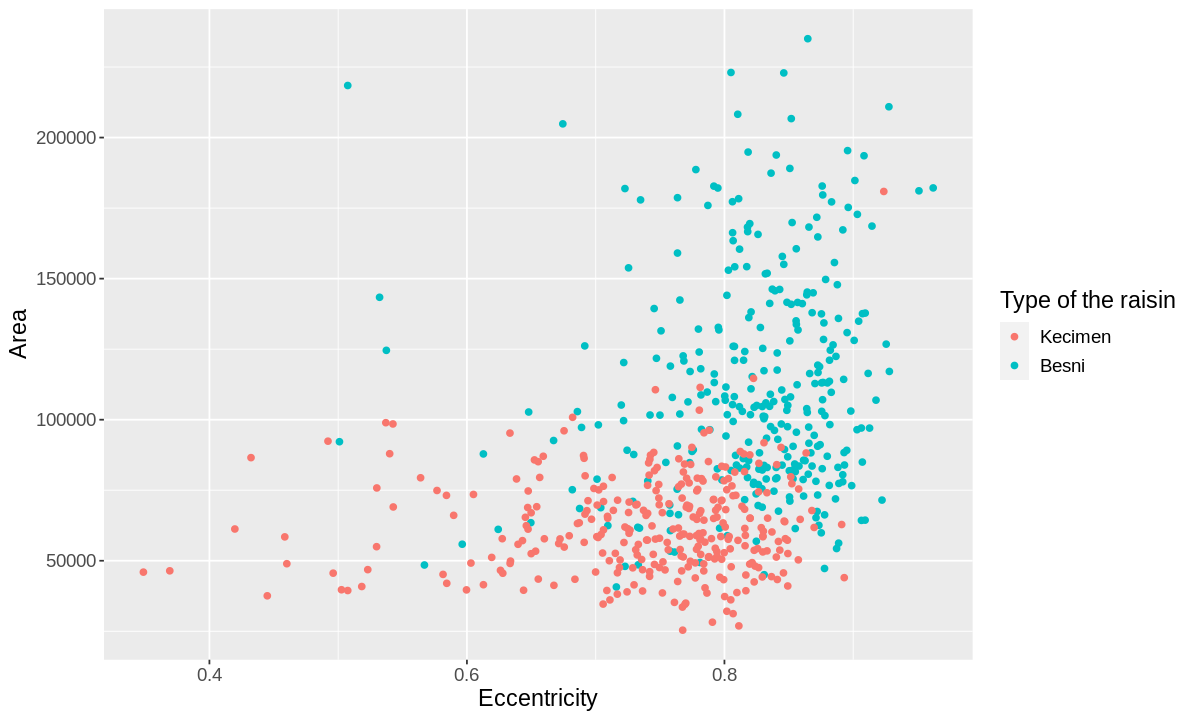

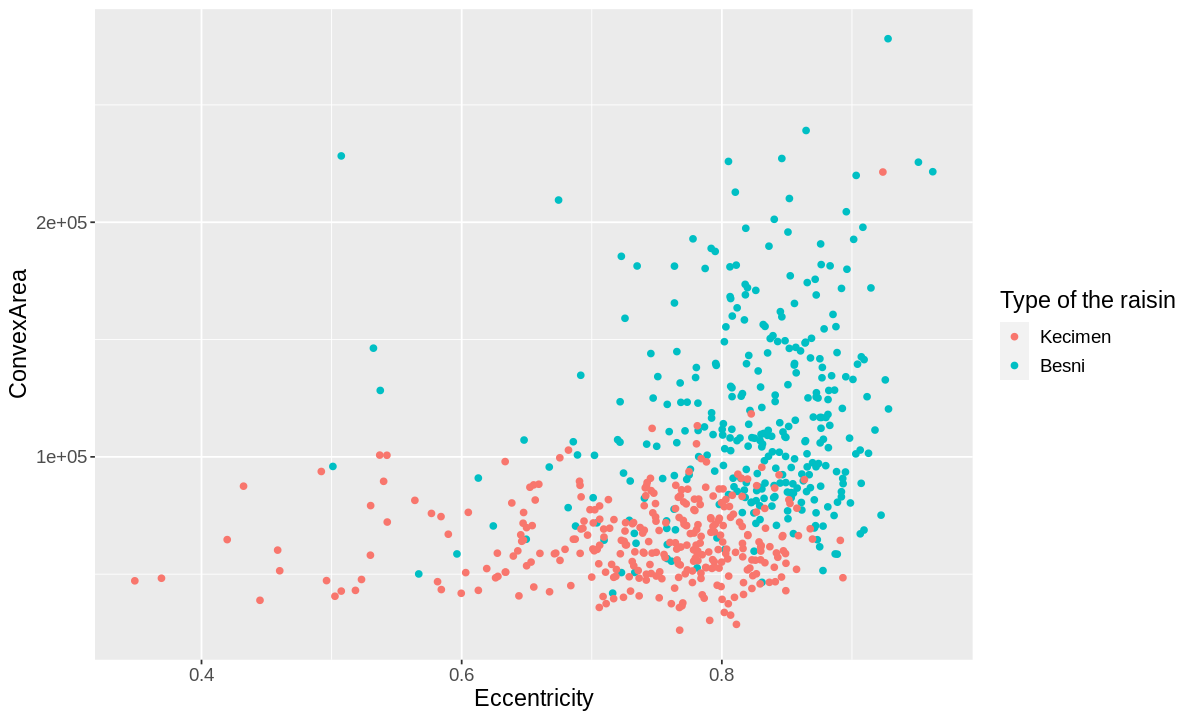

In [36]:
# Visualization of data
raisin_plot_1 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_1    # how the relationship between predictor "Eccentricity" and predictor "Perimeter" determine the type of the raisin

raisin_plot_2 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = Area, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_2    # how the relationship between predictor "Eccentricity" and predictor "Area" determine the type of the raisin

raisin_plot_3 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "ConvexArea", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_3    # how the relationship between predictor "Eccentricity" and predictor "ConvexArea" determine the type of the raisin